# 十七.图像锐化与边缘检测之Roberts算子、Prewitt算子、Sobel算子和Laplacian算子

	由于收集图像数据的器件或传输数图像的通道的存在一些质量缺陷，文物图像时间久远，或者受一些其他外界因素、动态不稳定抓取图像的影响，使得图像存在模糊和有噪声的情况，从而影响到图像识别工作的开展。这时需要开展图像锐化和边缘检测处理，加强原图像的高频部分，锐化突出图像的边缘细节，改善图像的对比度，使模糊的图像变得更清晰。图像锐化和边缘提取技术可以消除图像中的噪声，提取图像信息中用来表征图像的一些变量，为图像识别提供基础。通常使用灰度差分法对图像的边缘、轮廓进行处理，将其凸显。本文分别采用Laplacian算子、Robert算子、Prewitt算子和Sobel算子进行图像锐化边缘处理实验。
	本节主要讲解灰度线性变换，基础性知识希望对您有所帮助。
    1.Roberts算子
    2.Prewitt算子
    3.Sobel算子
    4.Laplacian算子
    5.总结代码


## 17.1.Roberts算子

Roberts算子又称为交叉微分算法，它是基于交叉差分的梯度算法，通过局部差分计算检测边缘线条。常用来处理具有陡峭的低噪声图像，当图像边缘接近于正45度或负45度时，该算法处理效果更理想。其缺点是对边缘的定位不太准确，提取的边缘线条较粗。Roberts算子的模板分为水平方向和垂直方向，如公式所示，从其模板可以看出，Roberts算子能较好的增强正负45度的图像边缘。


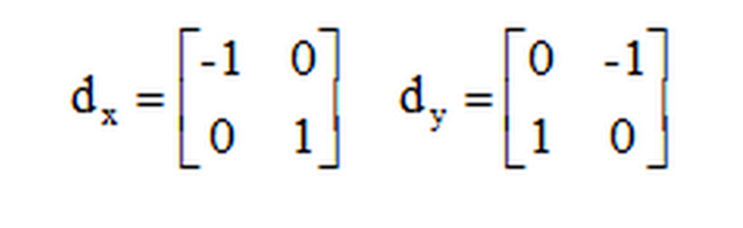

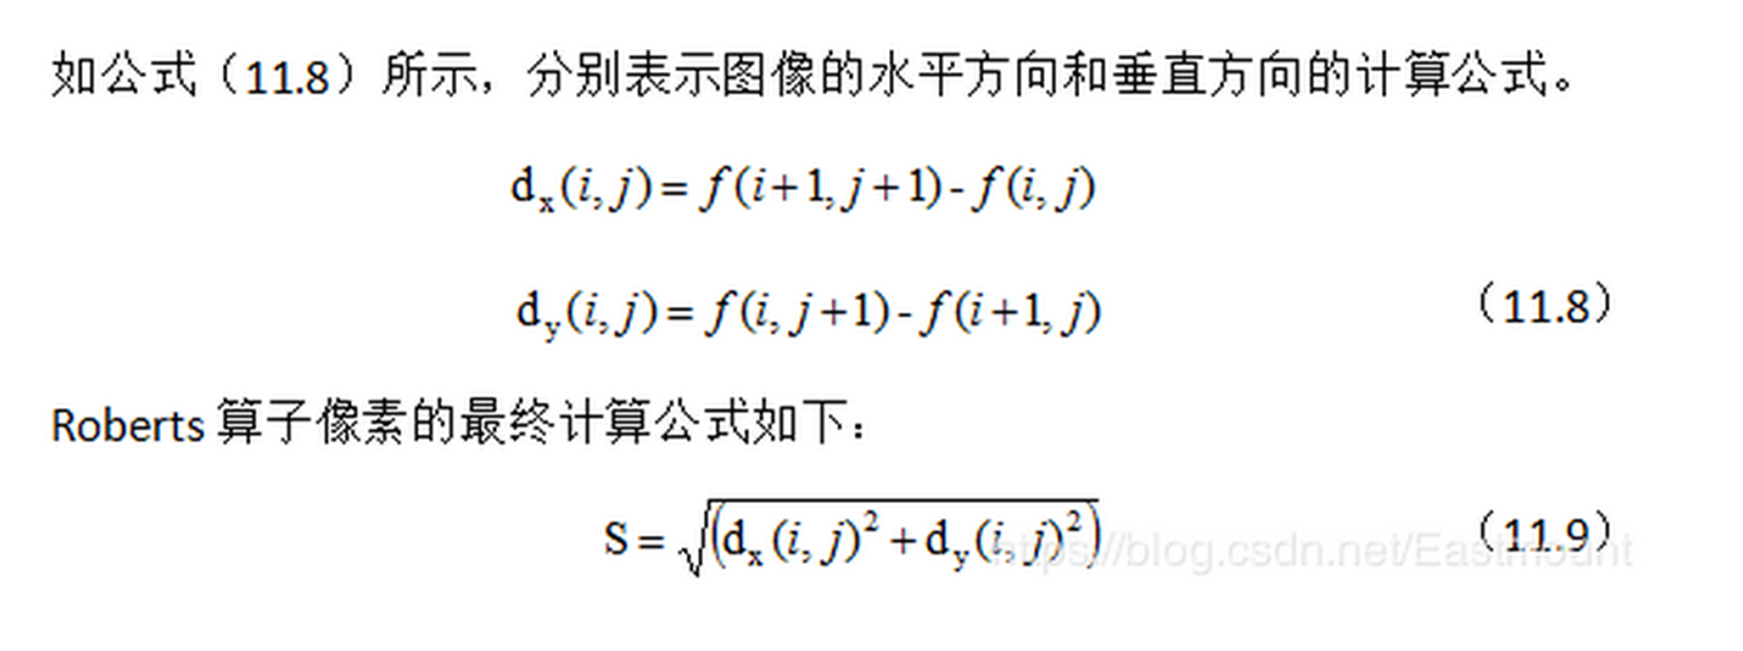

在Python中，Roberts算子主要通过Numpy定义模板，再调用OpenCV的filter2D()函数实现边缘提取。该函数主要是利用内核实现对图像的卷积运算，其函数原型如下所示：dst = filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])src表示输入图像dst表示输出的边缘图，其大小和通道数与输入图像相同ddepth表示目标图像所需的深度kernel表示卷积核，一个单通道浮点型矩阵anchor表示内核的基准点，其默认值为（-1，-1），位于中心位置delta表示在储存目标图像前可选的添加到像素的值，默认值为0borderType表示边框模式
Python实现代码如下所示：

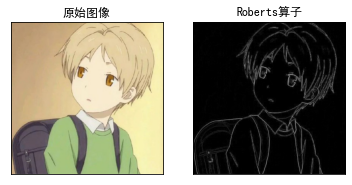

(400, 400)


In [1]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图像
img = cv2.imread('test.jpg')
lenna_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
#Roberts算子
kernelx = np.array([[-1,0],[0,1]], dtype=int)
kernely = np.array([[0,-1],[1,0]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
#转uint8 
absX = cv2.convertScaleAbs(x)      
absY = cv2.convertScaleAbs(y)    
Roberts = cv2.addWeighted(absX,0.5,absY,0.5,0)

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']



#显示图形
titles = [u'原始图像', u'Roberts算子']  
images = [lenna_img, Roberts]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()
result = cv2.resize(images[1], None, fx=0.3, fy=0.3)

print(images[1].shape)
cv2.imshow("Gray Image",result )
#等待显示



## 17.2.Prewitt算子

Prewitt是一种图像边缘检测的微分算子，其原理是利用特定区域内像素灰度值产生的差分实现边缘检测。由于Prewitt算子采用33模板对区域内的像素值进行计算，而Robert算子的模板为22，故Prewitt算子的边缘检测结果在水平方向和垂直方向均比Robert算子更加明显。Prewitt算子适合用来识别噪声较多、灰度渐变的图像，其计算公式如下所示。


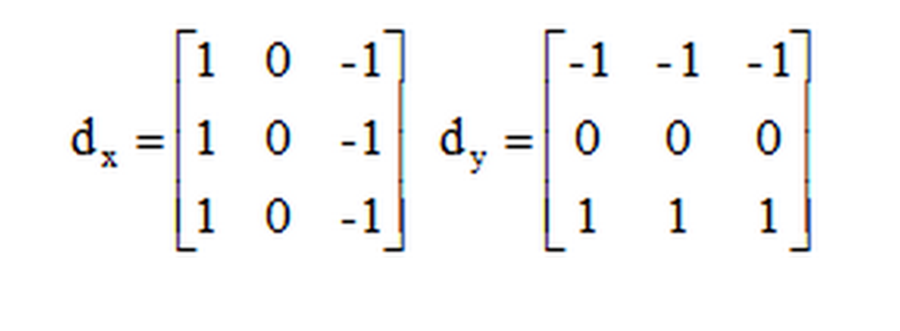

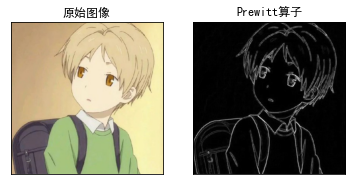

In [2]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('test.jpg')

lenna_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Prewitt算子
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
# 转uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']

# 显示图形
titles = [u'原始图像', u'Prewitt算子']
images = [lenna_img, Prewitt]
for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()





## 17.3.Sobel算子

Sobel算子是一种用于边缘检测的离散微分算子，它结合了高斯平滑和微分求导。该算子用于计算图像明暗程度近似值，根据图像边缘旁边明暗程度把该区域内超过某个数的特定点记为边缘。Sobel算子在Prewitt算子的基础上增加了权重的概念，认为相邻点的距离远近对当前像素点的影响是不同的，距离越近的像素点对应当前像素的影响越大，从而实现图像锐化并突出边缘轮廓。Sobel算子的边缘定位更准确，常用于噪声较多、灰度渐变的图像。其算法模板如公式所示，其中dx表示水平方向，dy表示垂直方向。


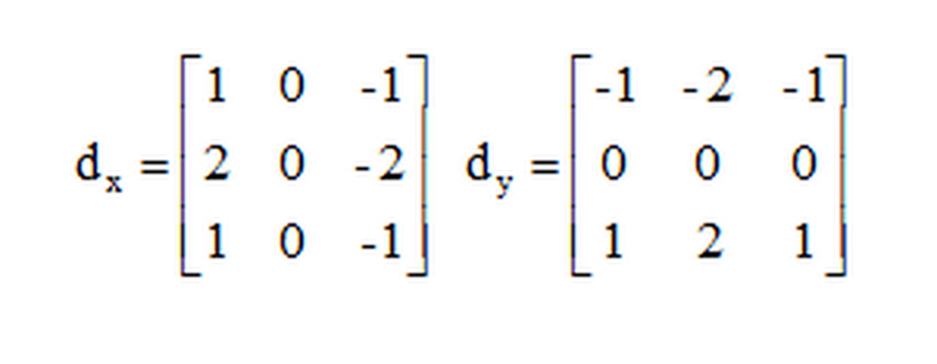

Sobel算子根据像素点上下、左右邻点灰度加权差，在边缘处达到极值这一现象检测边缘。对噪声具有平滑作用，提供较为精确的边缘方向信息。因为Sobel算子结合了高斯平滑和微分求导（分化），因此结果会具有更多的抗噪性，当对精度要求不是很高时，Sobel算子是一种较为常用的边缘检测方法。dst = Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])src表示输入图像dst表示输出的边缘图，其大小和通道数与输入图像相同ddepth表示目标图像所需的深度，针对不同的输入图像，输出目标图像有不同的深度dx表示x方向上的差分阶数，取值1或 0dy表示y方向上的差分阶数，取值1或0ksize表示Sobel算子的大小，其值必须是正数和奇数scale表示缩放导数的比例常数，默认情况下没有伸缩系数delta表示将结果存入目标图像之前，添加到结果中的可选增量值borderType表示边框模式，更多详细信息查阅BorderTypes


注意，在进行Sobel算子处理之后，还需要调用convertScaleAbs()函数计算绝对值，并将图像转换为8位图进行显示。其算法原型如下：dst = convertScaleAbs(src[, dst[, alpha[, beta]]])src表示原数组dst表示输出数组，深度为8位alpha表示比例因子beta表示原数组元素按比例缩放后添加的值Sobel算子的实现代码如下所示：


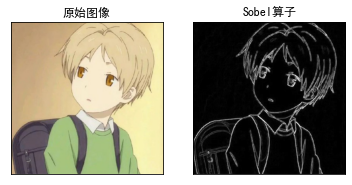

True

In [28]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图像
img = cv2.imread('test.jpg')
lenna_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
#Sobel算子
x = cv2.Sobel(grayImage, cv2.CV_16S, 1, 0) #对x求一阶导
y = cv2.Sobel(grayImage, cv2.CV_16S, 0, 1) #对y求一阶导
absX = cv2.convertScaleAbs(x)      
absY = cv2.convertScaleAbs(y)    
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图形
titles = [u'原始图像', u'Sobel算子']  
images = [lenna_img, Sobel]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()

## 17.4.Laplacian算子

拉普拉斯（Laplacian）算子是n维欧几里德空间中的一个二阶微分算子，常用于图像增强领域和边缘提取。它通过灰度差分计算邻域内的像素，基本流程是：判断图像中心像素灰度值与它周围其他像素的灰度值，如果中心像素的灰度更高，则提升中心像素的灰度；反之降低中心像素的灰度，从而实现图像锐化操作。在算法实现过程中，Laplacian算子通过对邻域中心像素的四方向或八方向求梯度，再将梯度相加起来判断中心像素灰度与邻域内其他像素灰度的关系，最后通过梯度运算的结果对像素灰度进行调整。Laplacian算子分为四邻域和八邻域，四邻域是对邻域中心像素的四方向求梯度，八邻域是对八方向求梯度。其中，四邻域模板如公式所示：


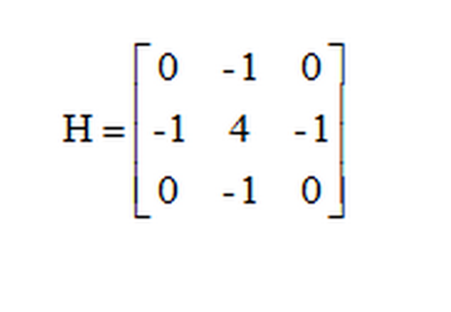

拉普拉斯（Laplacian）算子是n维欧几里德空间中的一个二阶微分算子，常用于图像增强领域和边缘提取。它通过灰度差分计算邻域内的像素，基本流程是：判断图像中心像素灰度值与它周围其他像素的灰度值，如果中心像素的灰度更高，则提升中心像素的灰度；反之降低中心像素的灰度，从而实现图像锐化操作。在算法实现过程中，Laplacian算子通过对邻域中心像素的四方向或八方向求梯度，再将梯度相加起来判断中心像素灰度与邻域内其他像素灰度的关系，最后通过梯度运算的结果对像素灰度进行调整。Laplacian算子分为四邻域和八邻域，四邻域是对邻域中心像素的四方向求梯度，八邻域是对八方向求梯度。其中，四邻域模板如公式所示：



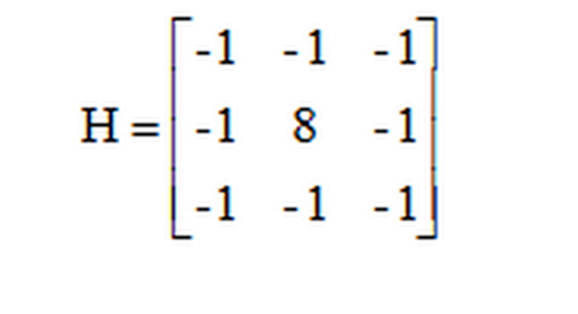

Python和OpenCV将Laplacian算子封装在Laplacian()函数中，其函数原型如下所示：

dst = Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])

src表示输入图像dst表示输出的边缘图，其大小和通道数与输入图像相同ddepth表示目标图像所需的深度ksize表示用于计算二阶导数的滤波器的孔径大小，其值必须是正数和奇数，且默认值为1，更多详细信息查阅getDerivKernelsscale表示计算拉普拉斯算子值的可选比例因子。默认值为1，更多详细信息查阅getDerivKernelsdelta表示将结果存入目标图像之前，添加到结果中的可选增量值，默认值为0borderType表示边框模式，更多详细信息查阅BorderTypes注意，Laplacian算子其实主要是利用Sobel算子的运算，通过加上Sobel算子运算出的图像x方向和y方向上的导数，得到输入图像的图像锐化结果。同时，在进行Laplacian算子处理之后，还需要调用convertScaleAbs()函数计算绝对值，并将图像转换为8位图进行显示。当ksize=1时，Laplacian()函数采用3×3的孔径（四邻域模板）进行变换处理。


下面的代码是采用ksize=3的Laplacian算子进行图像锐化处理，其代码如下：


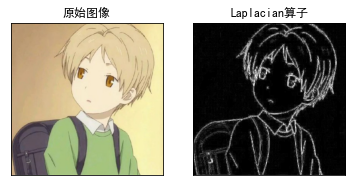

In [36]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图像
img = cv2.imread('test.jpg')
lenna_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
#拉普拉斯算法
dst = cv2.Laplacian(grayImage, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst) 

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图形
titles = [u'原始图像', u'Laplacian算子']  
images = [lenna_img, Laplacian]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()


#显示图像
cv2.imshow("Demo", images[1])

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()

# #写入图像
# cv2.imwrite("testyxz.jpg", img)



## 17.5.总结代码

边缘检测算法主要是基于图像强度的一阶和二阶导数，但导数通常对噪声很敏感，因此需要采用滤波器来过滤噪声，并调用图像增强或阈值化算法进行处理，最后再进行边缘检测。下面是采用高斯滤波去噪和阈值化处理之后，再进行边缘检测的过程，并对比了四种常见的边缘提取算法。


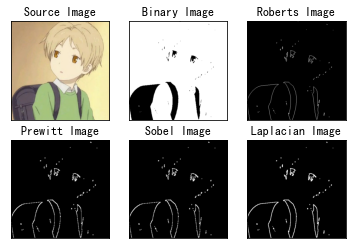

In [31]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取图像
img = cv2.imread('test.jpg')
lenna_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#高斯滤波
gaussianBlur = cv2.GaussianBlur(grayImage, (3,3), 0)

#阈值处理
ret, binary = cv2.threshold(gaussianBlur, 127, 255, cv2.THRESH_BINARY)

#Roberts算子
kernelx = np.array([[-1,0],[0,1]], dtype=int)
kernely = np.array([[0,-1],[1,0]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)     
absY = cv2.convertScaleAbs(y)    
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#Prewitt算子
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)  
absY = cv2.convertScaleAbs(y)    
Prewitt = cv2.addWeighted(absX,0.5,absY,0.5,0)

#Sobel算子
x = cv2.Sobel(binary, cv2.CV_16S, 1, 0)
y = cv2.Sobel(binary, cv2.CV_16S, 0, 1)    
absX = cv2.convertScaleAbs(x)   
absY = cv2.convertScaleAbs(y)    
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#拉普拉斯算法
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst) 

#效果图
titles = ['Source Image', 'Binary Image', 'Roberts Image',
          'Prewitt Image','Sobel Image', 'Laplacian Image']  
images = [lenna_img, binary, Roberts, Prewitt, Sobel, Laplacian]  
for i in np.arange(6):  
   plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show() 

输出结果如图所示。其中，Laplacian算子对噪声比较敏感，由于其算法可能会出现双像素边界，常用来判断边缘像素位于图像的明区或暗区，很少用于边缘检测；Robert算子对陡峭的低噪声图像效果较好，尤其是边缘正负45度较多的图像，但定位准确率较差；Prewitt算子对灰度渐变的图像边缘提取效果较好，而没有考虑相邻点的距离远近对当前像素点的影响；Sobel算子考虑了综合因素，对噪声较多的图像处理效果更好。
